1. Importing all the necessary librabries and package recquired.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

2. Importing the dataset and creating a dataframe.

In [44]:
file_path = 'drugs_side_effects_drugs_com.csv'
data = pd.read_csv(file_path)
data

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


3. Diplaying the first 5 rows of the dataset

In [45]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


4. Fill missing values with appropriate placeholders

In [46]:
data['side_effects'].fillna('Unknown', inplace=True)
data['generic_name'].fillna('Unknown', inplace=True)
data['drug_classes'].fillna('Unknown', inplace=True)
data['rating'].fillna(0, inplace=True)
data['no_of_reviews'].fillna(0, inplace=True)

5. Decription about the Dataset or a detailed statistic.

In [47]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print(data.info())

The dataset has 2931 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2931 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medica

In [48]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [49]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')
print(data.dtypes.value_counts())

object     15
float64     2
Name: count, dtype: int64


In [50]:
data['rating'] = num_imputer.fit_transform(data[['rating']])
data['no_of_reviews'] = num_imputer.fit_transform(data[['no_of_reviews']])

In [52]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['side_effects', 'generic_name', 'drug_classes', 'rx_otc', 'pregnancy_category', 'csa']

for col in categorical_columns:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()

In [54]:
data['alcohol_interaction'] = data['alcohol'].apply(lambda x: 1 if x == 'X' else 0)
data['num_side_effects'] = data['side_effects'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)

In [55]:
scaler = StandardScaler()
scaled_columns = ['rating', 'no_of_reviews']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [56]:
print(data['pregnancy_category'].value_counts())

pregnancy_category
C    1611
B     509
N     436
D     228
X     129
A      18
Name: count, dtype: int64


In [57]:
features = ['rating', 'no_of_reviews', 'num_side_effects', 'alcohol_interaction']
X = data[features]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['1', '2'])

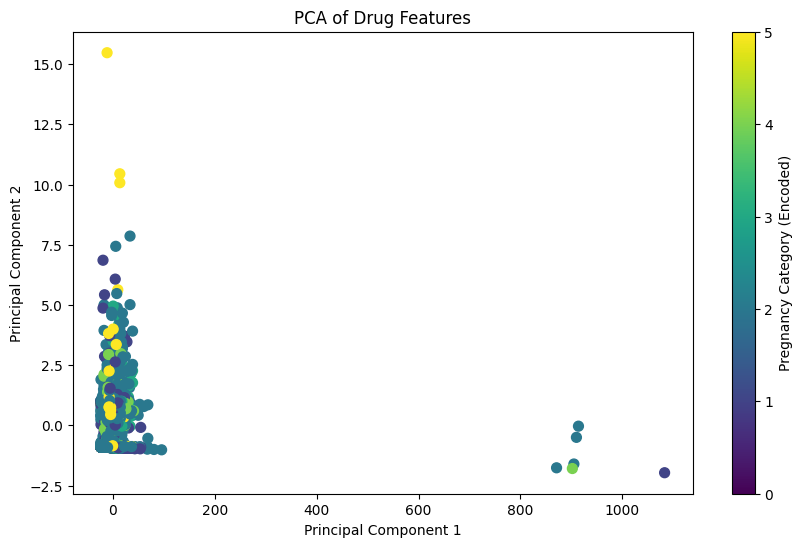

In [58]:
from sklearn.preprocessing import LabelEncoder
data['pregnancy_category'].fillna('Unknown', inplace=True)
label_enc = LabelEncoder()
data['pregnancy_category_numeric'] = label_enc.fit_transform(data['pregnancy_category'])
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['1'], pca_df['2'], c=data['pregnancy_category_numeric'], cmap='viridis', s=50)
plt.colorbar(label='Pregnancy Category (Encoded)')
plt.title('PCA of Drug Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


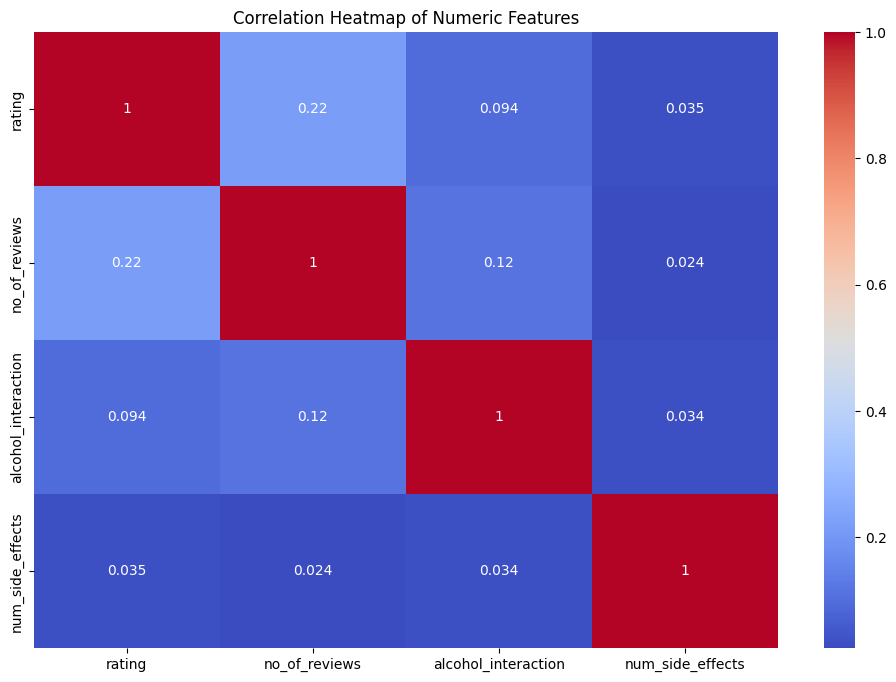

In [59]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


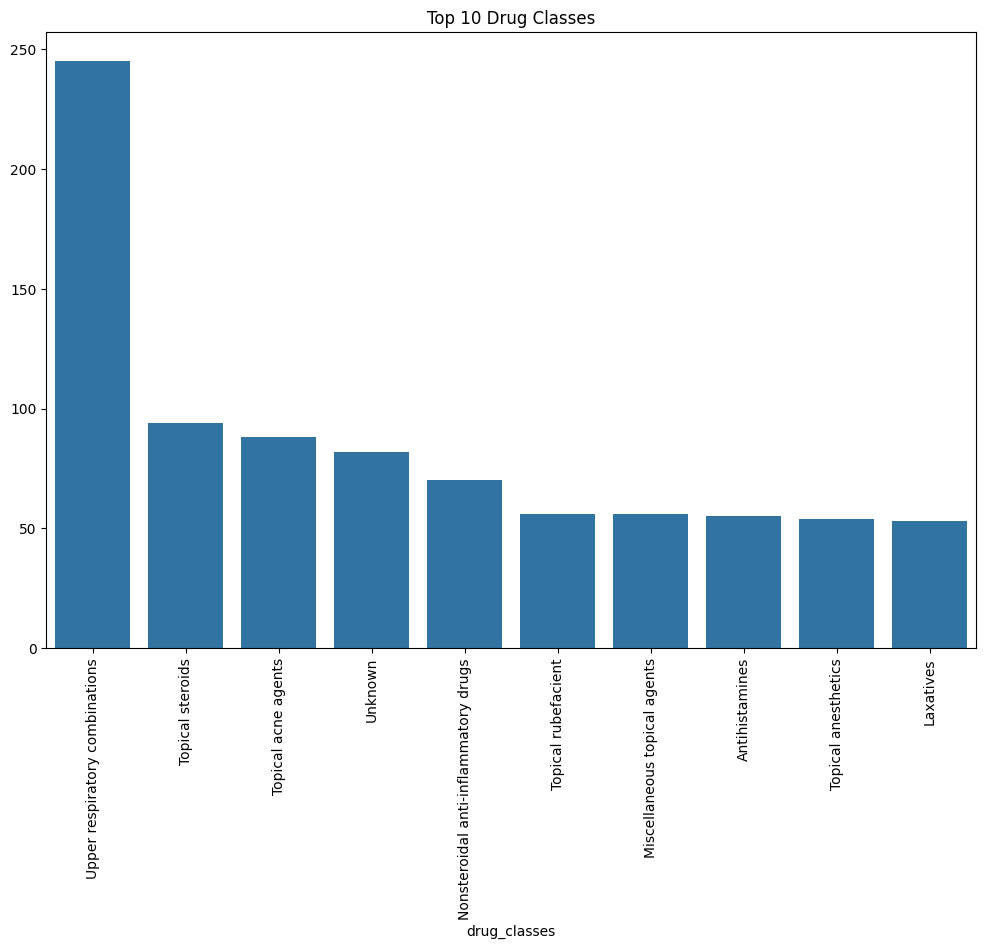

In [60]:
plt.figure(figsize=(12, 8))
top_classes = data['drug_classes'].value_counts().nlargest(10)
sns.barplot(x=top_classes.index, y=top_classes.values)
plt.title('Top 10 Drug Classes')
plt.xticks(rotation=90)
plt.show()

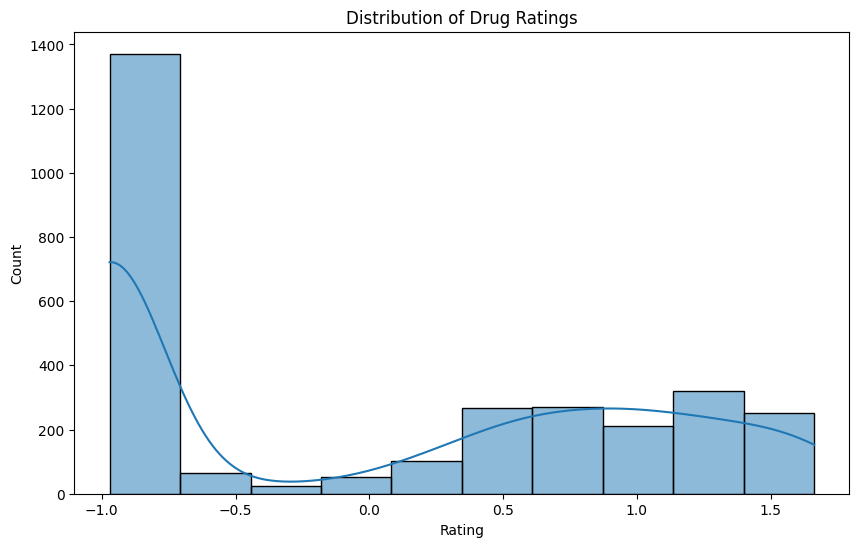

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()